## Кластеризация данных

### https://www.kaggle.com/dongeorge/seed-from-uci

About this file

To construct the data, seven geometric parameters of wheat kernels were measured:

1. area A,

2. perimeter P,

3. compactness C = 4*pi*A/P^2,

4. length of kernel,

5. width of kernel,

6. asymmetry coefficient

7. length of kernel groove.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# df = pd.read_csv('data/Seed_Data.csv')
df = pd.read_csv('https://gist.githubusercontent.com/urwinday/0ad1a22031628fb516ff080acea6787f/raw/8fd27d47343125e86bdfd7bf557ef0377e6831f2/Seed_Data.csv')
df.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [3]:
df['target'].unique()

array([0, 1, 2], dtype=int64)

In [4]:
df.drop('target', axis=1, inplace=True)
df.head()

,A,P,C,LK,WK,A_Coef,LKG
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [5]:
df.shape

(210, 7)

## Кластеризируем объекты используя K-Means 

In [6]:
from sklearn.cluster import KMeans

In [7]:
#Cluster the data
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
labels = kmeans.labels_
centers = kmeans.cluster_centers_
sum_square_dist = kmeans.inertia_
y_kmeans = kmeans.predict(df)
print(sum_square_dist)

587.3186115940427


### Визуализируем получившиеся кластеры
### в плоскости двух наиболее информативных признаков

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
#Glue back to original data
df['clusters'] = labels

columns = ['A', 'P']

#Add the column into our list
columns.extend(['clusters'])

#Analyzing the clusters
print(df[columns].groupby(['clusters']).mean())

                  A          P
clusters                      
0         14.648472  14.460417
1         18.721803  16.297377
2         11.964416  13.274805


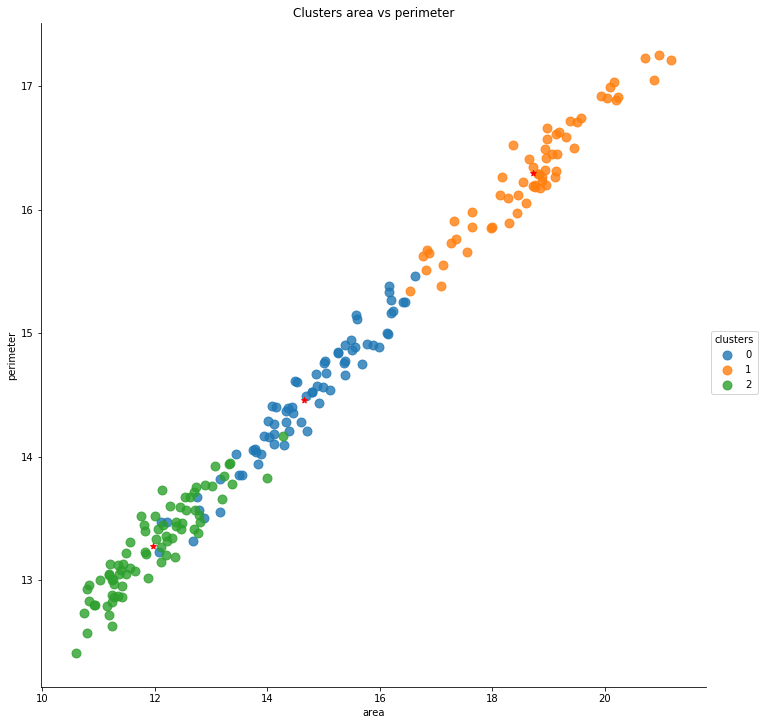

In [11]:
sns.lmplot('A', 'P',
           data=df,
           size = 10,
           fit_reg=False, 
           hue='clusters',  
           scatter_kws={"marker": "D",
                        "s": 80})

plt.scatter(centers[:,0], centers[:,1], marker="*", color='r') 

plt.title('Clusters area vs perimeter')
plt.xlabel('area')
plt.ylabel('perimeter')
plt.show;

### Дополнительно визуализируем кластеры в пространстве t-SNE

In [12]:
from sklearn.manifold import TSNE

tsne2 = TSNE()
tsne_results2 = tsne2.fit_transform(df)

In [13]:
df['x-tsne'] = tsne_results2[:,0]
df['y-tsne'] = tsne_results2[:,1]

In [14]:
# !pip install ggplot

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
from ggplot import *

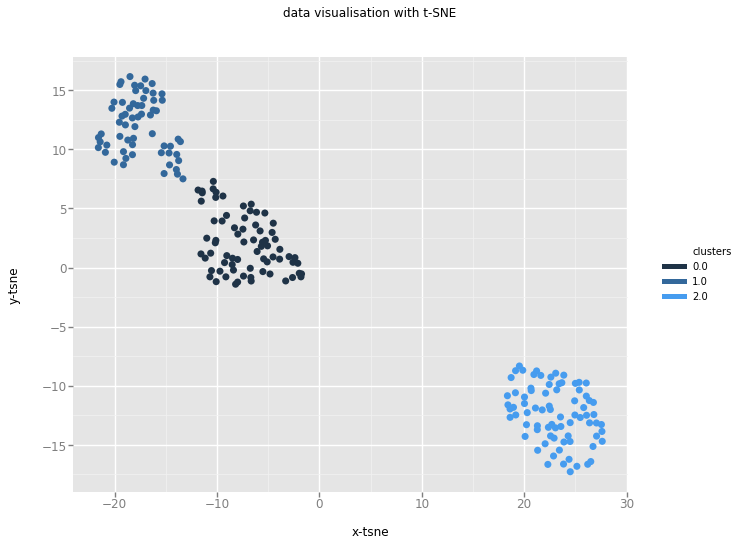

<ggplot: (-9223372036823364492)>

In [17]:
tsne_plot = ggplot(df, aes(x='x-tsne', y='y-tsne', color='clusters') ) \
        + geom_point(size=50,alpha=1) \
        + ggtitle("data visualisation with t-SNE");
tsne_plot